In [1]:
import gym
import tqdm
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_stats(env, policy, trajectory_len, n_action):
    return np.mean([test(env, policy, 100, n_actions, render=False) for i in range(25)])
def test(env, policy, trajectory_len, n_actions, render = False, ):
    state = env.reset()
    total_reward = 0
    
    for _ in tqdm.tqdm(range(trajectory_len), disable=not render):
        action = get_action(policy, state)
        state, reward, done, _ = env.step(action)
        total_reward += reward
        if render: 
            env.render()
            time.sleep(0.25)
        if  done: 
            break
    return total_reward

### $\varepsilon$-Greedy Policy:
$$
\begin{array}{l}
\pi(a|s) =
\left\{
\begin{array}{ll}
1 - \varepsilon + \varepsilon / m,& \text{ если } a \in \mathrm{argmax}_{a' \in \mathcal{A}}\, Q(s,a'),\\
\varepsilon / m,& \text{ иначе }
\end{array}
\right.
\end{array}
$$

In [3]:
def get_trajectory(env, policy):
    rewards = []
    actions = []
    states = []
    state = env.reset()
    while True:
        states.append(state)
        action = get_action(policy, state)
        actions.append(action)
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            break
    return states, actions, rewards

In [4]:
def epsilon_greedy_policy(eps, q_value):
    n_actions = q_value.shape[1]
    pol = np.zeros(q_value.shape)+ eps/n_actions
    idx = np.argmax(q_value, axis=1)
    pol[np.arange(q_value.shape[0]),idx] += 1-eps
    return pol
def epsilon_greedy_policy_action(eps, state, q_value):
    n_actions = q_value.shape[1]
    pol = np.zeros((n_actions,))+ eps/n_actions
    idx = np.argmax(q_value[state])
    pol[idx] += 1 - eps
    return np.random.choice(n_actions, p=pol)

In [5]:
def get_action(policy, state):
    return np.random.choice(policy.shape[1], p=policy[state])

In [17]:
eps = 1
q_value = np.array(\
          [[0.5,0.3,0.2],
           [0.1,0.7,0.2],
           [0.6,0.2,0.3],
           [0.4,0.3,0.3],
           [0.3333,0.3333,0.3333]])
new_policy = epsilon_greedy_policy(0.11, q_value)
new_policy

array([[0.92666667, 0.03666667, 0.03666667],
       [0.03666667, 0.92666667, 0.03666667],
       [0.92666667, 0.03666667, 0.03666667],
       [0.92666667, 0.03666667, 0.03666667],
       [0.92666667, 0.03666667, 0.03666667]])

In [18]:
acts = [get_action(new_policy, 1) for _ in range(1000)]

(array([ 25.,   0.,   0.,   0.,   0., 939.,   0.,   0.,   0.,  36.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

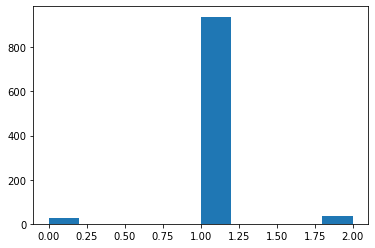

In [19]:
plt.hist(acts)

In [20]:
returns = np.zeros((len(rewards)))
gamma = 1
for t in range(len(rewards) - 2, -1, -1):
    print(t)
    returns[t] = rewards[t] + gamma * returns[t + 1]

198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [21]:
returns

array([-703., -702., -701., -700., -699., -698., -697., -696., -695.,
       -694., -693., -692., -682., -681., -680., -670., -669., -668.,
       -667., -666., -665., -655., -654., -653., -652., -642., -641.,
       -640., -639., -638., -628., -627., -626., -625., -624., -623.,
       -622., -621., -620., -619., -618., -617., -616., -615., -605.,
       -595., -594., -593., -592., -582., -581., -580., -579., -578.,
       -568., -558., -548., -538., -528., -518., -517., -516., -515.,
       -514., -513., -512., -511., -510., -509., -508., -498., -497.,
       -496., -495., -494., -493., -483., -473., -472., -471., -470.,
       -460., -450., -440., -430., -429., -428., -427., -426., -425.,
       -424., -423., -413., -403., -402., -401., -400., -399., -398.,
       -388., -378., -377., -376., -375., -374., -373., -363., -362.,
       -352., -351., -350., -340., -339., -338., -337., -336., -335.,
       -325., -315., -305., -304., -303., -302., -292., -291., -290.,
       -280., -279.,

In [22]:
rewards = [1,2,3,4]

def gratitude(gamma, rewards):
    G = np.zeros((len(rewards),))
    T = len(rewards)
    for t in range(T-1):
        for k in range(t, T-1):
#             print(k,t, k-t, G[t])
            G[t] += gamma**(k-t) * rewards[k]
    return G

gratitude(1, rewards)

array([6., 5., 3., 0.])

### Monte-Carlo Algorithm

Пусть $Q(s,a) = 0$, $N(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k \in \overline{1,K}$ делаем:

1. Согласно $\pi = \varepsilon\text{-greedy}(Q)$ получаем траекторию $\tau = (S_0,A_0,\ldots,S_T)$ и награды $(R_0,\ldots,R_{T-1})$. По ним определяем $(G_0,\ldots,G_{T-1}):$
$$
G_t = \sum\limits_{k=t}^{T-1} \gamma^{k-t} R_t,\quad G_{T-1} = R_{T-1},\quad G_{T-2} = R_{T-2} + \gamma R_{T-1},\quad G_i = R_i + \gamma G_{i+1},\quad G_{T} = Q(S_T,\pi_{\text{greedy}}(S_T)).
$$

2. Для каждого $t \in \overline{0,T-1}$ обновляем $Q$ и $N$:

$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t) + 1}\big(G_t - Q(S_t,A_t)\big),
$$

$$
N(S_t,A_t) \leftarrow N(S_t,A_t) + 1
$$
Уменьшаем $\varepsilon$

$$\pi^{k+1}(a|s) = \begin{cases}
1-\varepsilon+\varepsilon/m, \text{if } a \in \text{argmax}_{a'\in\mathcal{A}}Q^k(s,a')\\
\varepsilon/m, \text{otherwise}
\end{cases}$$
где $m=|\mathcal{A}|$

In [72]:
env = gym.make('Taxi-v3')
n_states = env.observation_space.n
n_actions = env.action_space.n
eps = 1
gamma = 0.99
N = np.zeros((n_states, n_actions))
Q = np.zeros((n_states, n_actions))
K = 1000
stats = []
policies = []
total_rewards = []
for ki in tqdm.tqdm_notebook(range(K)):
    policy = epsilon_greedy_policy(eps, Q)
    policies.append(policy)
    stats.append(test_stats(env, policy, 100, n_actions))

    states, actions, rewards = get_trajectory(env, policy)
    total_rewards.append(np.sum(rewards))
    G = gratitude(gamma, rewards)
    # updating Q
    for g, a, s in zip(G, actions, states):
        Q[s,a] += (g - Q[s,a])/(N[s,a]+1)
        N[s,a] += 1

    eps=1-ki/K

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [73]:
eps

0.0010000000000000009

In [74]:
data = []
for p in policies:
    max_action = np.argmax(p, axis=1)
    data= data+list(zip(range(len(max_action)), max_action))

  0%|          | 0/100 [12:17<?, ?it/s]


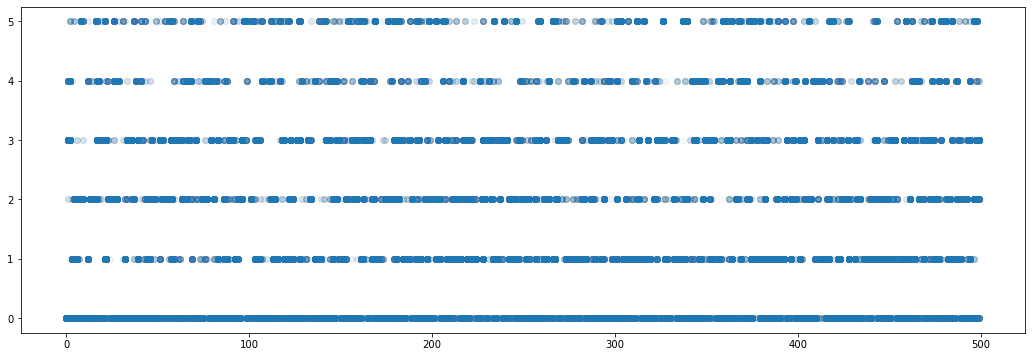

In [75]:
data = np.array(data)
plt.figure(figsize=(18,6))
plt.scatter(data[data[::,0]<500][::,0], data[data[::,0]<500][::,1], alpha=0.01)

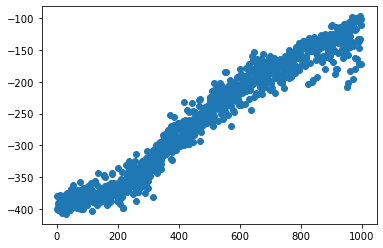

In [76]:
plt.scatter(range(len(stats)), stats)

In [79]:
np.argmax(total_rewards)

948

In [80]:
max_policies = policies[np.argmax(total_rewards)]

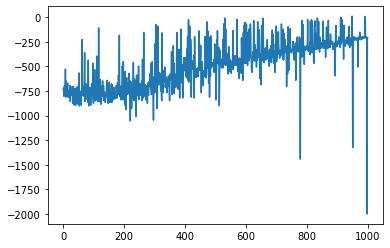

In [81]:
plt.plot(range(len(total_rewards)), total_rewards)

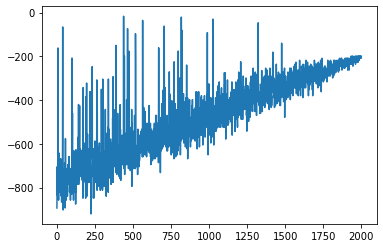

In [43]:
plt.plot(range(len(total_rewards)), total_rewards)

In [82]:
test(env, max_policies, 100, n_actions, render=True)

  0%|          | 0/100 [00:00<?, ?it/s]/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/gym/core.py:50: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "
100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


-118

In [51]:
eps

0.132619555894753

In [83]:
exp_rwrds = [test(env, max_policies, 100, n_actions, render=False) for i in tqdm.tqdm(range(100))]

100%|██████████| 100/100 [00:00<00:00, 101.37it/s]


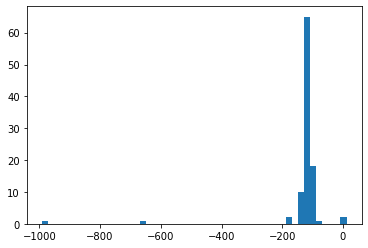

In [84]:
plt.hist(exp_rwrds, bins=50)
plt.show()

### SARSA Algorithm 
Пусть $Q(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

1. Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$, 
где $\pi = \varepsilon\text{-greedy}(Q)$, получаем награду $R_t$, переходим в состояние $S_{t+1}$, совершаем действие $A_{t+1} \sim \pi(\cdot|S_{t+1})$

2. По $(S_t,A_t,R_t,S_{t+1},A_{t+1})$ обновляем $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t))
$$

Уменьшаем $\varepsilon$


In [9]:
env = gym.make('Taxi-v3')
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.9
eps = 0.9
gamma = 0.99
Q = np.zeros((n_states, n_actions))
K = 1000

stats = []
policies = []
total_rewards = []


for ki in tqdm.tqdm_notebook(range(K)):
    rewards = []
    state = env.reset()
    action = epsilon_greedy_policy_action(eps, state, Q)
    
    actions = [action]
    states = [state]

    while True:
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        states.append(state)
        action = epsilon_greedy_policy_action(eps, state, Q)
        actions.append(action)
        if done:
            break
        # updating Q
        Q[states[-2],actions[-2]] += alpha*(reward + gamma*Q[states[-2],actions[-2]])-Q[states[-2],actions[-2]]

    total_rewards.append(np.sum(rewards))
    eps=1-ki/K

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


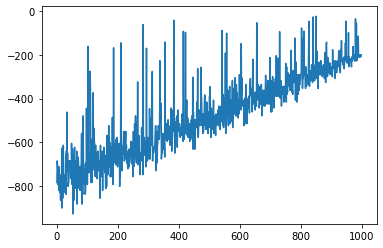

In [10]:
plt.plot(range(len(total_rewards)), total_rewards)

### Q-Learning Algorithm

Пусть $Q(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

1. Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$, 
где $\pi = \varepsilon\text{-greedy}(Q)$, получаем награду $R_t$  переходим в состояние $S_{t+1}$.

2. По $(S_t,A_t,R_t,S_{t+1})$ обновляем $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma \max\limits_{a'} Q(S_{t+1},a') - Q(S_t,A_t))
$$

Уменьшаем $\varepsilon$

In [20]:
env = gym.make('Taxi-v3')
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.9
eps = 0.9
gamma = 0.99
Q = np.zeros((n_states, n_actions))
K = 1000

stats = []
policies = []
total_rewards = []


for ki in tqdm.tqdm_notebook(range(K)):
    rewards = []
    state = env.reset()
    action = epsilon_greedy_policy_action(eps, state, Q)
    
    actions = [action]
    states = [state]

    while True:
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        states.append(state)
        action = epsilon_greedy_policy_action(eps, state, Q)
        actions.append(action)
        if done:
            break

        # updating Q
        Q[states[-2],actions[-2]] += alpha*(reward + gamma*max(Q[states[-1]]))-Q[states[-2],actions[-2]]

    total_rewards.append(np.sum(rewards))
    eps*=0.997

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


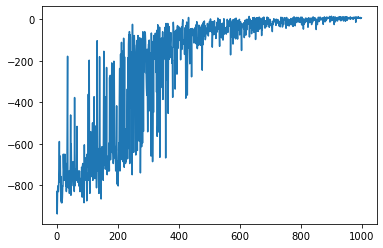

In [14]:
plt.plot(range(len(total_rewards)), total_rewards)

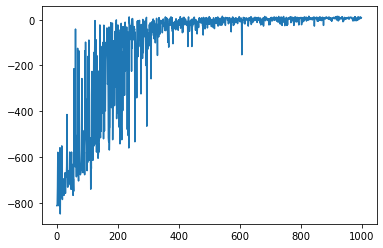

In [21]:
plt.plot(range(len(total_rewards)), total_rewards)